## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
ab_data = pd.read_csv('ab_data.csv')
ab_data.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
ab_data.shape

(294478, 5)

In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


c. The number of unique users in the dataset.

In [5]:
unique = pd.unique(ab_data['user_id'])
len(unique)

290584

## There is 29K Unique User ID's

d. The proportion of users converted.

In [6]:
converted = ab_data['converted'] == 1
ab_data[converted].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35237 entries, 4 to 294443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       35237 non-null  int64 
 1   timestamp     35237 non-null  object
 2   group         35237 non-null  object
 3   landing_page  35237 non-null  object
 4   converted     35237 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


## There is 35K Converted users out of nearly 294K users

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
no_match = ((ab_data['group'] == 'treatment') == (ab_data['landing_page'] == 'new_page')) == False
ab_data[no_match].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 22 to 294331
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       3893 non-null   int64 
 1   timestamp     3893 non-null   object
 2   group         3893 non-null   object
 3   landing_page  3893 non-null   object
 4   converted     3893 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 136.9+ KB


## There is nearly 4K records where the group is 'Treatment' and the landing page is 'New Page' don't line up

f. Do any of the rows have missing values?

In [8]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


## There is no null values what so ever in this dataset, looks like we are good :)

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = ab_data.drop(ab_data[no_match].index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

## All Evel Data are removed successfully :)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].unique().size

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(df2['user_id'].duplicated().index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 16.0+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [16]:
p_convert = df2['converted'].mean()
p_convert

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_convert_control = df2['group'] == 'control'
df2[p_convert_control]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_convert_treatment = df2['group'] == 'treatment'
df2[p_convert_treatment]['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [19]:
(df2['landing_page'] == 'new_page').mean()

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## My null hypothesis will be that the conversion rate of the old page is less than or equal to that of the new page (**$p_{old}$** <= **$p_{new}$**)
## This means that the alternative hypothesis will be that the conversion rate for the old page is greater than the new page (**$p_{old}$** > **$p_{new}$**)  

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [57]:
p_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]/df2[df2['landing_page'] == 'new_page'].shape[0]
p_new

0.11880724790277405

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [58]:
p_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]/df2[df2['landing_page'] == 'old_page'].shape[0]
p_old

0.1203863045004612

## From the $p$ values obtained above apparently the conversion rates are the same for the new page and the old page

c. What is $n_{new}$?

In [22]:
n_new = df2[df2['landing_page'] == 'new_page'].count()
n_new.mean()

145311.0

d. What is $n_{old}$?

In [23]:
n_old = df2[df2['landing_page'] == 'old_page'].count()
n_old.mean()

145274.0

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [67]:
for _ in range(n_new.count()):
    boot_sample = n_new.sample(10000, replace = True)
    new_page_converted = (boot_sample['converted'] == 1).count() / boot_sample.count()
new_page_converted.mean()

0.205

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [68]:
for _ in range(n_old.count()):
    boot_sample = n_old.sample(10000, replace = True)
    old_page_converted = (boot_sample['converted'] == 1).count()/ boot_sample.count()
old_page_converted.mean()

0.1993

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [69]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.005699999999999983

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [70]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new.shape[0], p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size = n_old.shape[0], p=[1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

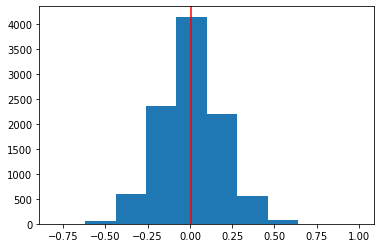

In [71]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color = 'red')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [72]:
(p_diffs > obs_diff).mean()

0.2841

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

I think what i just computed is that all values simulated of the conversion rates of new page and old page all have the same diffrence, which suggests that there is no diffrence what so ever between both pages

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [31]:
sm.stats.proportions_ztest(n_new.mean(),  (p_new - p_old), alternative = 'smaller',value = 0)

(-0.03973734491039821, 0.4841512641225198)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The -0.0394 z-score means that 3% more of the 'new_page' users converted compared to the 'old_page' users, a p-value of 0.48 suggests that the diffrence between conversion rates is statisticaly significant :)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

## Logestic Regression is best fit for this case :)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
## Creating Dummy Data, and the 'intercept'
ab_data['intercept'] = 1
ab_data['ab_page'] = 1
ab_data['ab_page'] = pd.get_dummies(ab_data['group'] == 'control')
ab_data.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
#%pip install statsmodels

In [34]:
lm = sm.Logit(ab_data['converted'], ab_data[['intercept', 'ab_page']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:               7.093e-06
Time:                        21:10:04   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

## 0.216, it suggests that the page wether treatment or control is not statsticaly determenant to whether a user converts

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It's almost always useful to consider more contributing factors that affect the exeplanatory variable. (Considering of course running necessary tests to see if they affect it and how much is that effect)

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'))

In [36]:
df_new.head(10)

,country,timestamp,group,landing_page,converted
user_id,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0
630008,US,2017-01-11 16:11:11.131461,control,old_page,0
630009,US,2017-01-05 23:35:15.820565,control,old_page,1


In [37]:
### Creating the necessary dummy variables
df_new['intercept'] = 1
df_new['ab_page'] = 1
df_new['ab_page'] = pd.get_dummies(df_new['group'] == 'control')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [38]:
pd.get_dummies(df_new['country']).head()

,CA,UK,US
user_id,,,
630000,0,0,1
630001,0,0,1
630002,0,0,1
630003,0,0,1
630004,0,0,1


In [39]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('US', axis = 1)
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1,1,1,0,0
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0,1,1,0,0
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,1,0,0,0
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,1,0,0,0


In [40]:
lm = sm.Logit(df_new['converted'], df_new[['intercept','CA', 'UK', 'ab_page']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:               2.324e-05
Time:                        21:10:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
==============================================================================
"""

In [41]:
np.exp(-0.0408), np.exp(0.0099), np.exp(-0.015) 

(0.9600211149716509, 1.0099491671175422, 0.9851119396030626)

In [42]:
1/ np.exp(-0.0408), 1/ np.exp(-0.015)

(1.0416437559600236, 1.015113064615719)

## This means that it's 1.0099 more likely that a user will convert if he/she are from the UK rather than the US but 1.04 less likely to convert if from Canada rather than the US, holding all other factors constant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
df_new['country_page_CA'] = df_new['ab_page'] * df_new['CA']

In [44]:
### Fitting the Linear Model
lm = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK', 'country_page_CA']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:               2.827e-05
Time:                        21:10:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1980
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9906      0.009   -221.524      0.000      -2.008      -1.973
ab_page            -0.0123      0.012     -1.048      0.295      -0.035       0.011
CA                 -0.0134      0.038     -0.357      0.721      -0.087       0.060
UK                  0.0099      0.013      0.744      0.457      -0.016       0.036
country_page_CA    -0.0552      0.053     -1.035      0.301      -0.160       0.049
===================================================================================
"""

In [45]:
1/ np.exp(-0.0552)

1.0567519439306503

## This means that it's 1.06 less likely that a user will convert if he/she is in Canada and was placed in the treatment group, holding all other factors constant

In [46]:
df_new['country_page_UK'] = df_new['ab_page'] * df_new['UK']
lm = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','CA', 'country_page_UK']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:               3.126e-05
Time:                        21:10:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1555
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9850      0.009   -209.690      0.000      -2.004      -1.966
ab_page            -0.0236      0.013     -1.786      0.074      -0.049       0.002
UK                 -0.0072      0.019     -0.387      0.699      -0.044       0.029
CA                 -0.0407      0.027     -1.515      0.130      -0.093       0.012
country_page_UK     0.0344      0.026      1.306      0.192      -0.017       0.086
===================================================================================
"""

In [47]:
np.exp(0.0344)

1.0349985233486143

## This means that it's 1.035 more likely that the user will convert if he/she is in the UK and in the treatment group, holding all other factors constant

<a id='conclusions'></a>
## Conclusions

- The page wether treatment or control is not statsticaly determenant to whether a user converts.
- It's 1.0099 more likely that a user will convert if he/she are from the UK rather than the US but 1.04 less likely to convert if from Canada rather than the US, holding all other factors constant.
- It's suggested that you launch the new page in the UK, US and to keep the old page in Canada :)
